# Data analysis [Data science] 

## Extract insights from combining US census data and the Washington Post's database on deaths by police in the United States.


In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from datetime import datetime
import calendar

pd.set_option('display.max_columns', None)

## Read the Data 

In [2]:
deaths_data = pd.read_csv('csv\Deaths_by_Police_US.csv', encoding='cp1252')
media_income = pd.read_csv('csv\Median_Household_Income_2015.csv', encoding='cp1252')

## Data Exploration & Cleaning

In [3]:
print(deaths_data.shape)
print(deaths_data.columns)

(2535, 14)
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


## Check for Duplicates

In [4]:
print(deaths_data.duplicated().sum)

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
2530    False
2531    False
2532    False
2533    False
2534    False
Length: 2535, dtype: bool>


## Check for NaN Values

In [5]:
print(deaths_data.isna().sum())
deaths_data = deaths_data.fillna('Not specified')

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64


## Convert Date to Datetime 

In [6]:
deaths_data['Date'] = pd.to_datetime(deaths_data['date'])
deaths_data['Year'] = [date.year for date in deaths_data.Date]
deaths_data['Month'] = [datetime.strptime(str(date), '%d/%m/%y').month for date in deaths_data.date]
deaths_data['month'] = [calendar.month_name[month] for month in deaths_data.Month]
deaths_data['Day'] = [datetime.strptime(str(date), '%d/%m/%y').day for date in deaths_data.date]

### Let us first examine the percentage of deaths by gender.

## Deaths by Police US by gender 

In [7]:
deaths_gender = deaths_data.gender.value_counts()

fig = px.pie(labels=deaths_gender.index, values=deaths_gender.values,
             title='Deaths by Police US by gender',
             names=deaths_gender.index,
             hole=0
             )
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent+label')
fig.show()

<a href="img\Deaths_by_Police_in_US_by_gender.htm" target="_blank">
<img src="img\Deaths_by_Police_in_US_by_gender.png">
</a>

### What behavior can be observed by race?
## Deaths by Police in US by race

In [ ]:
deaths_race = deaths_data.race.value_counts()

fig = px.pie(labels=deaths_race.index, values=deaths_race.values,
             title='Deaths by Police US by race',
             names=deaths_race.index,
             hole=0
             )
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent+label')
fig.show()

<a href="img\Deaths_by_Police_in_US_by_race.htm" target="_blank">
<img src="img\Deaths_by_Police_in_US_by_race.png">
</a>

### Group by age and race 
## Deaths by Police in US by age and race

In [ ]:
deaths_race_age = deaths_data.groupby(['race', 'age'], as_index=False).\
    agg({'id': pd.Series.count}).sort_values(['id'], ascending=False)

# Clear not specified
deaths_race_age = deaths_race_age[deaths_race_age.age != 'Not specified']

# Group by range of age
deaths_race_age = deaths_race_age.groupby([pd.cut(deaths_race_age['age'], [15, 20, 40, 50, 60, 70, 95]), 'race']).sum()


deaths_race_age_new = deaths_race_age.reset_index()  # reset Multi_Index to index

deaths_race_age_new.age = deaths_race_age_new.age.astype(str)
deaths_race_age_plot = deaths_race_age_new.sort_values(['race', 'id'], ascending=False)

In [ ]:
sun_chart = px.sunburst(deaths_race_age_new,
                        path=['race', 'age'],
                        values=deaths_race_age_new.id.values,
                        title='Deaths by Police in US by age and race',
                        labels={"values": "Number of deaths"})
sun_chart.show()

<a href="img\Deaths_by_Police_in_US_by_age_and_race_(sunburst).htm" target="_blank">
<img src="img\Deaths_by_Police_in_US_by_age_and_race_(sunburst).png">
</a>

In [ ]:
bar = px.bar(deaths_race_age_new, x='race', y='id',
             color='age',
             color_continuous_scale='Aggrnyl',
             labels={"id": "Number of deaths"}
             )
bar.update_layout(yaxis_title='Number of deaths', xaxis_title='Race',
                  title='Deaths by Police in US by age and race')
bar.show()


<a href="img\Deaths_by_Police_in_US_by_age_and_race.htm" target="_blank">
<img src="img\Deaths_by_Police_in_US_by_age_and_race.png">
</a>

### Regardless of race, the highest percentage of deaths by age is between 20-40 years old.

### Does the number of deaths increase in a specific month?
## Number of deaths by month

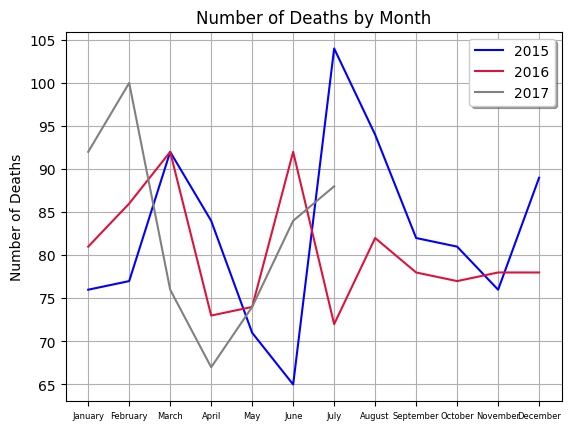

In [ ]:
deaths_by_month = deaths_data.groupby(['Year', 'month', 'Month'], as_index=False).\
    agg({'id': pd.Series.count}).sort_values(['Year', 'Month'], ascending=True)


plt.figure()
plt.xticks(fontsize=6, rotation=0)
plt.title('Number of Deaths by Month')
ax1 = plt.gca()  # get the axes
ax1.plot(deaths_by_month.month[0:12], deaths_by_month.id[0:12], color='blue', label='2015')
ax1.plot(deaths_by_month.month[12:24], deaths_by_month.id[12:24], color='crimson', label='2016')
ax1.plot(deaths_by_month.month[24:31], deaths_by_month.id[24:31], color='gray', label='2017')
ax1.set_ylabel('Number of Deaths')
ax1.legend(loc='upper right', shadow=True, fontsize='medium')
plt.grid()
plt.show()

### There is no trend, however it could be analyzed in more detail.

## TYPE OF WEAPON USED

In [ ]:
type_weapon = deaths_data.armed.value_counts()

fig = px.pie(labels=type_weapon.index, values=type_weapon.values,
             title='TYPE OF WEAPON USED',
             names=type_weapon.index,
             hole=0
             )
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent+label')
fig.show()

<a href="img\type_of_weapon_used.htm" target="_blank">
<img src="img\type_of_weapon_used.png">
</a>

## Flee the scene

In [ ]:
flee_scene = deaths_data.flee.value_counts()

fig = px.pie(labels=flee_scene.index, values=flee_scene.values,
             title='Flee the scene?',
             names=flee_scene.index,
             hole=0
             )
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent+label')
fig.show()

<a href="img\Flee_the_scene.htm" target="_blank">
<img src="img\Flee_the_scene.png">
</a>

## Signs of mental illness

In [ ]:
mental_illness = deaths_data.signs_of_mental_illness.value_counts()

fig = px.pie(labels=mental_illness.index, values=mental_illness.values,
             title='Signs of mental illness',
             names=mental_illness.index,
             hole=0
             )
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent+label')
fig.show()

<a href="img\Signs_of_mental_illness.htm" target="_blank">
<img src="img\Signs_of_mental_illness.png">
</a>

## Threat level

In [ ]:
threat_level = deaths_data.threat_level.value_counts()

fig = px.pie(labels=threat_level.index, values=threat_level.values,
             title='Threat level',
             names=threat_level.index,
             hole=0
             )
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent+label')
fig.show()

<a href="img\Threat_level.htm" target="_blank">
<img src="img\Threat_level.png">
</a>

### Was cameras used as testimony?
## Body camera

In [ ]:
body_camera = deaths_data.body_camera.value_counts()

fig = px.pie(labels=body_camera.index, values=body_camera.values,
             title='Deaths by Police US: Use of Body Camera',
             names=body_camera.index,
             hole=0
             )
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent+label')
fig.show()

<a href="img\Use_of_Body_Camera.htm" target="_blank">
<img src="img\Use_of_Body_Camera.png">
</a>

###  Let us review now, the deaths by state
## Deaths by Police in US by state

In [ ]:

deaths_state = deaths_data.groupby(['state'], as_index=False).\
    agg({'id': pd.Series.count}).sort_values(['id'], ascending=True)


map_plot = px.choropleth(deaths_state, locations='state',
                         title='Number of deaths by state', color='id',
                         locationmode='USA-states',
                         color_continuous_scale='hot_r',
                         hover_name='state',
                         scope="usa",
                         )
map_plot.show()

<a href="img\Number_of_deaths_by_state.htm" target="_blank">
<img src="img\Number_of_deaths_by_state.png">
</a>

### The state of California, followed by the state of Texas, has the highest number of deaths by police in the US.

### How does the level of education influence the reduction of incidents?

In [ ]:
completed_HS = pd.read_csv('csv\Pct_Over_25_Completed_High_School.csv', encoding='cp1252')

""" Data Exploration & Cleaning """
# print(completed_HS.shape)
# print(completed_HS.columns)

""" Check for Duplicates """
# print(completed_HS.duplicated().sum)

""" Check for NaN Values """
# print(completed_HS.isna().sum()) # 0
indexComplete = completed_HS[(completed_HS['percent_completed_hs'] == '-')].index
completed_HS.drop(indexComplete, inplace=True)
completed_HS['percent_completed_hs'] = completed_HS['percent_completed_hs'].astype(float)

#

completed_HS_state = completed_HS.groupby('Geographic Area')['percent_completed_hs'].mean()


plt.figure()
map_plot = px.choropleth(locations=completed_HS_state.index,
                         title='Percent over 25 Completed High School', color=completed_HS_state.values,
                         locationmode='USA-states',
                         color_continuous_scale='hot_r',
                         hover_name=completed_HS_state.index,
                         scope="usa",
                         labels={"color": "Pct Completed High School Average"}
                         )
map_plot.show()

<Figure size 640x480 with 0 Axes>

<a href="img\Percent_over_25_Completed_High_School.htm" target="_blank">
<img src="img\Percent_over_25_Completed_High_School.png">
</a>

### How does the median income level influence the reduction of incidents?

In [ ]:
""" Data Exploration & Cleaning """
# print(media_income.shape)
# print(media_income.columns)

""" Check for Duplicates """
# print(media_income.duplicated().sum)

""" Check for NaN Values """
# print(media_income.isna().sum())
media_income = media_income.dropna()
indexIncome = media_income[(media_income['Median Income'] == '-') | (media_income['Median Income'] == '(X)') |
                           (media_income['Median Income'] == '2,500-') | (media_income['Median Income'] == '250,000+')].index
media_income.drop(indexIncome, inplace=True)
media_income['Median Income'] = media_income['Median Income'].astype(int)

median_income_state = media_income.groupby('Geographic Area')['Median Income'].mean()

plt.figure()
map_plot = px.choropleth(locations=median_income_state.index,
                         title='Median Income by state', color=median_income_state.values,
                         locationmode='USA-states',
                         color_continuous_scale='hot_r',
                         hover_name=median_income_state.index,
                         scope="usa",
                         labels={"color": "Median Income Average"}
                         )
map_plot.show()

<Figure size 640x480 with 0 Axes>

<a href="img\Media_Income_by_State.htm" target="_blank">
<img src="img\Media_Income_by_State.png">
</a>

### Although California has one of the highest median incomes, it is the state with the highest number of deaths by police.

In [ ]:
below_poverty_level = pd.read_csv('csv\Pct_People_Below_Poverty_Level.csv', encoding='cp1252')

""" Data Exploration & Cleaning """
#print(below_poverty_level.shape)
#print(below_poverty_level.columns)

""" Check for Duplicates """
# print(below_poverty_level.duplicated().sum)

""" Check for NaN Values """
# print(below_poverty_level.isna().sum())
indexLevel = below_poverty_level[(below_poverty_level['poverty_rate'] == '-')].index
below_poverty_level.drop(indexLevel, inplace=True)

below_poverty_level['poverty_rate'] = below_poverty_level['poverty_rate'].astype(float)
below_poverty_level_state = below_poverty_level.groupby('Geographic Area')['poverty_rate'].mean()


plt.figure()
map_plot = px.choropleth(locations=below_poverty_level_state.index,
                         title='Percentage People Below Poverty Level', color=below_poverty_level_state.values,
                         locationmode='USA-states',
                         color_continuous_scale='hot_r',
                         hover_name=below_poverty_level_state.index,
                         scope="usa",
                         labels={"color": "Pct Below Poverty Level"},
                         )
map_plot.show()

<Figure size 640x480 with 0 Axes>

<a href="img\Percentage_People_Below_Poverty_Level.htm" target="_blank">
<img src="img\Percentage_People_Below_Poverty_Level.png">
</a>